In [1]:
#-*- coding: utf-8 -*-

<img align="right" style="max-width: 200px; height: auto" src="hsg_logo.png">

###  Lab 03 - "Supervised Machine Learning"

Introduction to AI and ML, University of St. Gallen, Autumn Term 2019

In the last lab, you learned about Python programming elements such as conditions, loops as well as how to implement functions etc. In this third lab, we will build our first supervised machine learning "pipeline" using:


>- (1) the **Gaussian Naive-Bayes (GNB)** classifier, and; 
>- (2) the **k Nearest-Neighbours (kNN)** classifier 

you learned about in the lecture.

The **Naive-Bayes (NB)** classifier belongs to the family of simple "probabilistic classifiers" based on applying Bayes' theorem with a strong (naive) independence assumptions between the features. Naive Bayes has been studied extensively since the 1950s and remains an accessible (baseline) method for text categorization as well as other domains.


The **k Nearest-Neighbours (kNN)** is a simple, easy to understand, versatile, but powerful machine learning algorithm. Until recently (prior to the advent of deep learning approaches) it was used in a variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. 

As always, pls. don't hesitate to ask all your questions either during the lab, post them in our CANVAS (StudyNet) forum (https://learning.unisg.ch), or send us an email (using the course email).

### Lab Objectives:

After today's lab you should be able to:

> 1. Understand how a Gaussian **Naive-Bayes (NB)** classifier can be trained and evaluated.
> 2. Understand how a **k Nearest-Neighbor (kNN)** classifier can be trained and evaluated.
> 3. Know how to Python's sklearn library to **train** and **evaluate** arbitrary classifiers.
> 4. Understand how to **evaluate** and **interpret** the classification results.

Before we start let's watch a motivational video:

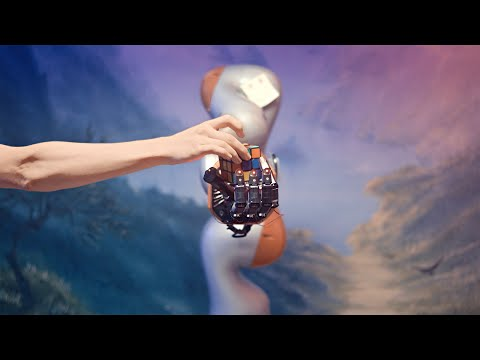

In [2]:
from IPython.display import YouTubeVideo
# OpenAI: "Solving Rubik's Cube with a Robot Hand"
YouTubeVideo('x4O8pojMF0w', width=1024, height=576)

### Step 0: Setup of the Analysis Environment

Similar to the previous labs, we need to import a couple of Python libraries that allow for data analysis and data visualization. In this lab will use the pandas, numpy, sklearn, matplotlib and seaborn library. Let's import the libraries by the execution of the statements below:

In [3]:
# import the numpy, scipy and pandas data science library
import pandas as pd
import numpy as np
from scipy.stats import norm

# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

# import sklearn naive.bayes and k-nearest neighbor classifier library
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

Enable inline Jupyter notebook plotting:

In [4]:
%matplotlib inline

Set random seed of all our experiments:

In [5]:
random_seed = 42

## A. Gaussian "Naive-Bayes" (NB) Classification

### Step 1.0: Dataset Download and Data Assessment

The **Iris Dataset** is a classic and straightforward dataset often used as a "Hello World" example in multi-class classification. This data set consists of measurements taken from three different types of iris flowers (referred to as **Classes**),  namely the Iris Setosa, the Iris Versicolour, and, the Iris Virginica) and their respective measured petal and sepal length (referred to as **Features**).

<img align="center" style="max-width: 700px; height: auto" src="iris_dataset.png">

(Source: http://www.lac.inpe.br/~rafael.santos/Docs/R/CAP394/WholeStory-Iris.html)

In total, the dataset consists of **150 samples** (50 samples taken per class) as well as their corresponding **4 different measurements** taken for each sample. Please, find below the list of the individual measurements:

>- `Sepal length (cm)`
>- `Sepal width (cm)`
>- `Petal length (cm)`
>- `Petal width (cm)`

Further details of the dataset can be obtained from the following puplication: *Fisher, R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950)."*

Let's load the dataset and conduct a preliminary data assessment: 

In [6]:
iris = datasets.load_iris()

Print and inspect the names of the four features contained in the dataset:

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Determine and print the feature dimensionality of the dataset:

In [8]:
iris.data.shape

(150, 4)

Determine and print the class label dimensionality of the dataset:

In [9]:
iris.target.shape

(150,)

Print and inspect the names of the three classes contained in the dataset:

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's briefly envision how the feature information of the dataset is collected and presented in the data:

<img align="center" style="max-width: 900px; height: auto" src="feature_collection.png">

Let's inspect the top five feature rows of the Iris Dataset:

In [11]:
pd.DataFrame(iris.data, columns=iris.feature_names).head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let's also inspect the top five class labels of the Iris Dataset:

In [12]:
pd.DataFrame(iris.target, columns=["class"]).head(5)

,class
0,0
1,0
2,0
3,0
4,0


Let's now conduct a more in depth data assessment. Therefore, we plot the feature distributions of the Iris dataset according to their respective class memberships as well as the features pairwise relationships.

Pls. note that we use Python's **Seaborn** library to create such a plot referred to as **Pairplot**. The Seaborn library is a powerful data visualization library based on the Matplotlib. It provides a great interface for drawing informative statstical graphics (https://seaborn.pydata.org). 

<Figure size 720x720 with 0 Axes>

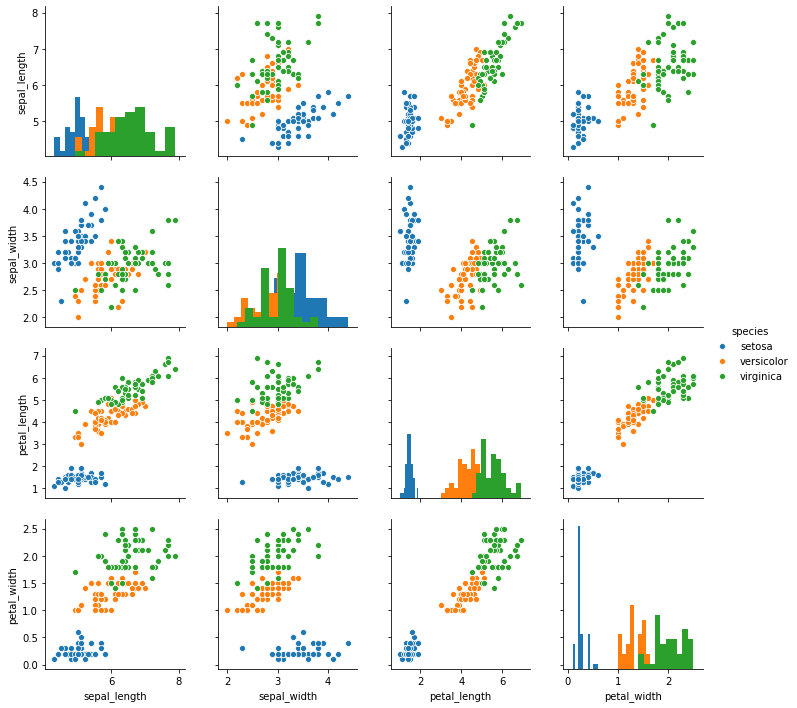

In [13]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

It can be observed from the created Pairplot, that most of the feature measurements that correspond to flower class "setosa" exhibit a nice **linear seperability** from the feature measurements of the remaining flower classes. In addition, the flower classes "versicolor" and "virginica" exhibit a commingled and **non-linear seperability** across all the measured feature distributions of the Iris Dataset.

### Step 1.1. Dataset Pre-Processing

To understand and evaluate the performance of any trained supervised machine learning model, it is good practice, to divide the dataset into a **training set** (the fraction of data records solely used for training purposes) and a **evaluation set** (the fraction of data records solely used for evaluation purposes). Pls. note, the **evaluation set** will never be shown to the model as part of the training process.

<img align="center" style="max-width: 500px; height: auto" src="train_eval_dataset.png">

We set the fraction of evaluation records to **30%** of the original dataset:

In [14]:
eval_fraction = 0.3

Randomly split the dataset into training set and evaluation set using sklearns `train_test_split` function:

In [15]:
# 70% training and 30% evaluation
x_train, x_eval, y_train, y_eval = train_test_split(iris.data, iris.target, test_size=eval_fraction, random_state=random_seed, stratify=None)

Evaluate the training set dimensionalities:

In [16]:
x_train.shape, y_train.shape

((105, 4), (105,))

Evaluate the evaluation set dimensionalities:

In [17]:
x_eval.shape, y_eval.shape

((45, 4), (45,))

### Step 1.2. Gaussian Naive-Bayes (NB) Classification

One popular (and remarkably simple) algorithm is the **Naive Bayes Classifier**. Note that one natural way to adress a given classification task is via the probabilistic question: **What is the most likely class $\hat{c}$ given a set of observations $x$?** Formally, we wish to output a prediction for $c$ by calculating its posterior probabilities $P(c|x)$ given the expression:

$$\hat{c} = \arg \max_{c} P(c|x)$$

In probability theory, the posterior probability referrs to the probability of observing a particular class $c$ after taking into consideration all the available information $x$. In our case this would unfortunately require that we estimate $P(c | \mathbf{x})$ for every value of $\mathbf{x} = x_1, x_2, ..., x_n$. 

Imagine that each feature could take one of just 2 values. For example, the feature $x_1 = 1$ might signify that the word pumpkin appears in a given document and $x_1 = 0$ would signify that it does not. If we had 30 such binary features, that would mean that we need to be prepared to calculate the probability $P(c | \mathbf{x})$ of any of $2^{30}$ (over 1 billion) possible values of the input vector $\mathbf{x}$. Moreover, where is the learning? If we need to see every single possible example in order to predict the corresponding label then we're not really learning a pattern but just memorizing the dataset.

One solution to this challenge is the so-called **Bayes' theorem** (alternatively Bayes' law or Bayes' rule) that you learned about in the lecture. It provides an elegant way of calculating class posterior probabilities $P(c|x)$ without the need of seeing every single possible example. Let's briefly revisit the formula of the Bayes' theorem below:

<img align="center" style="max-width: 400px; height: auto" src="bayes_theorem.png">

In the formula of the **Bayes' theorem** above,

>- $P(c|x)$ denotes the **posterior** probability of class $c$ given a set of features $x$ denoted by $x_1, x_2, ..., x_n$.
>- $P(c)$ denotes the **prior** probability of observing class $c$.
>- $P(x|c)$ denotes the **likelihood** which is the probability of a feature $x$ given class $c$.
>- $P(x)$ denotes the **evidence** which is the general probability of observing feature $x$.

Now, using the **chain rule** of probability, we can express the likelihood term $P( \mathbf{x} | c)$ as:

$$P( \mathbf{x} | c) = P(x_1 | c) \cdot P(x_2 | x_1, c) \cdot ... \cdot P( x_n | x_1, ..., x_{n-1}, c)$$

By itself, this expression doesn't get us any further. We still need (in a worst case) estimate roughly $2^d$ parameters. The trick of the (naive) Bayes' theorem however is to assume that the distinct features $x_1, x_2, ..., x_n$ are conditionally independent from each other given a particular class $c$. 

Using this assumption we're in much better shape, as the likelihood term $p( \mathbf{x} | c)$ term simplifies to: 

$$P( \mathbf{x} | c) = P(x_1 | c) \cdot P(x_2 | c) \cdot ... \cdot P( x_n | c) = \prod^n_i P(x_i | c)$$

Estimating each term in $\prod^n_i p(x_i | c)$ amounts to estimating just one feature distribution. So our assumption of conditional independence has taken the complexity of our model (in terms of the number of parameters) from an exponential dependence on the number of features to a linear dependence. Hence, we call it the **"naive"** Bayes' theorem, since it makes the naive assumption about feature independence, so we don't have to care about dependencies among them.

#### Step 1.2.1. Calculation of the prior probabilities $P(c)$ of each class

Let's get an intuition of the Bayes' theorem by first calculating the prior probability $P(c)$ of each class iris flower contained in the dataset. Therefore, we first obtain the number of occurance of each class in the extracted training data:

In [18]:
# determine counts of unique class labels
unique, counts = np.unique(y_train, return_counts=True)

# concatenate counts and class labels in a python dictionary
class_counts = dict(zip(unique, counts))

# print obtained dictionary
print(class_counts)  

{0: 31, 1: 37, 2: 37}


Let's convert the obtained counts into probabilites. Therefore, we divide the class counts by the overall number of observations contained in the extracted training data:

In [19]:
# divide counts by the number of observations available in the training data
prior_probabilities = counts / np.sum(counts)

# print obtained probabilites
print(prior_probabilities)

[0.2952381  0.35238095 0.35238095]


#### Step 1.2.2. Calculation of the evidence $P(x)$ of each feature

Let's now calculate the general probability of observing feature $𝑥$ which denotes the evidence $P(x)$ of a feature.

During the lecture you learned that evidence distribution can be approximated by a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$. This simplification is justified by the application of the "law of large numbers" or "Central Limit Theorem" (you may want to have a look at further details of the theorem under: https://en.wikipedia.org/wiki/Central_limit_theorem). In general, the probability density of a Gaussian "Normal" distribution, as defined by the formula below. It is parametrized its mean $\mu$ and corresponding standard deviation $\sigma$:

<img align="center" style="max-width: 600px; height: auto" src="evidence_calculation.png">

Using the "law of large numbers" we will approximate the probability density $P(x) \approx \mathcal{N}(x | \mu, \sigma)$ of each of each feature by a Gaussian. But how can this be achieved? 

Let's start by inspecting the true probability density of the **sepal length** feature (the first feature) of the Iris Dataset. The following line of code determines a histogram of the true **sepal length** feature value distribution and plots it accordingly:

In [20]:
# determine a histogram of the "sepal length" feature value distribution
hist_probabilities, hist_edges = np.histogram(x_train[:, 0], bins=10, range=(0,10), density=True)

# print the histogram feature value probabilites
print(hist_probabilities)

# print the histogram edges
print(hist_edges)

[0.         0.         0.         0.         0.13333333 0.42857143
 0.33333333 0.1047619  0.         0.        ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Let's also plot the probability density accordingly:

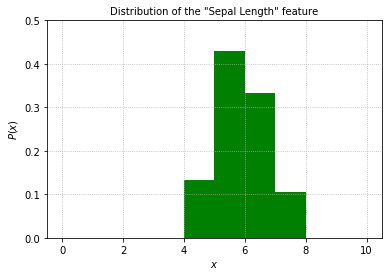

In [21]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations
ax.hist(x_train[:, 0], bins=10, range=(0, 10), density=True, color='g')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)
ax.set_ylim([0.0, 0.5])

# add plot title
ax.set_title('Distribution of the "Sepal Length" feature', fontsize=10);

How can we approximate the true probability density of the **sepal length** feature using a Gaussian distribution? Well, all we need to do is to calculate it's mean $\mu$ and standard deviation $\sigma$. Let's start by calculating the mean $\mu$ of the **sepal length** feature:

In [22]:
# calculate the mean of the sepal length observations
mean_sepal_length = np.mean(x_train[:, 0])

# print the obtained mean
print(mean_sepal_length)

5.8428571428571425


Let's continue by calculating the standard devition $\sigma$ of the **sepal length** feature:

In [23]:
# calculate the standard deviation of the sepal length observations
std_sepal_length = np.std(x_train[:, 0])

# print the obtained standard deviation
print(std_sepal_length)

0.8293264212149339


We can now determine the approximate Gaussian (Normal) probability density distribution $\mathcal{N}(\mu, \sigma)$ of the **sepal length** feature using the $\mu$ and $\sigma$ obtained above. Thereby, we will utilize the `pdf.norm` function available in the `scipy.stats` package:

In [24]:
# calculate the probability density function of the Gaussian distribution
hist_gauss_sepal_length = norm.pdf(np.arange(0, 10, 0.1), mean_sepal_length, std_sepal_length)

# print obtained probabilities
print(hist_gauss_sepal_length)

[8.01301016e-12 1.86029102e-11 4.25649052e-11 9.59860307e-11
 2.13329039e-10 4.67280334e-10 1.00876641e-09 2.14629446e-09
 4.50063276e-09 9.30129531e-09 1.89451859e-08 3.80311880e-08
 7.52430678e-08 1.46716406e-07 2.81952822e-07 5.34022795e-07
 9.96847508e-07 1.83393206e-06 3.32524262e-06 5.94222397e-06
 1.04655071e-05 1.81659084e-05 3.10770328e-05 5.23971366e-05
 8.70685164e-05 1.42593693e-04 2.30157468e-04 3.66130078e-04
 5.74025688e-04 8.86977961e-04 1.35076535e-03 2.02736796e-03
 2.99896106e-03 4.37214602e-03 6.28208880e-03 8.89608792e-03
 1.24159411e-02 1.70783458e-02 2.31524815e-02 3.09339137e-02
 4.07340673e-02 5.28647601e-02 6.76176911e-02 8.52393228e-02
 1.05902260e-01 1.29674937e-01 1.56492110e-01 1.86129164e-01
 2.18183545e-01 2.52066505e-01 2.87007912e-01 3.22075865e-01
 3.56211614e-01 3.88278687e-01 4.17123455e-01 4.41642899e-01
 4.60854121e-01 4.73959553e-01 4.80401847e-01 4.79903192e-01
 4.72485180e-01 4.58467259e-01 4.38443911e-01 4.13242845e-01
 3.83868278e-01 3.514347

Let's now plot the approximate Gaussian (Normal) probability density distribution $P(x) \approx \mathcal{N}(\mu, \sigma)$:

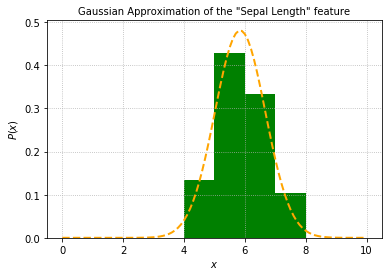

In [25]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), hist_gauss_sepal_length, color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations
ax.hist(x_train[:, 0], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Length" feature', fontsize=10);

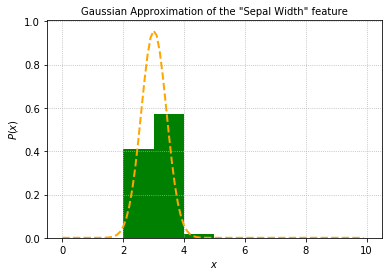

In [26]:
# determine mean and std of the "sepal width" feature
mean_sepal_width = np.mean(x_train[:, 1])
std_sepal_width = np.std(x_train[:, 1])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_sepal_width, std_sepal_width), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal width" observations
ax.hist(x_train[:, 1], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Width" feature', fontsize=10);

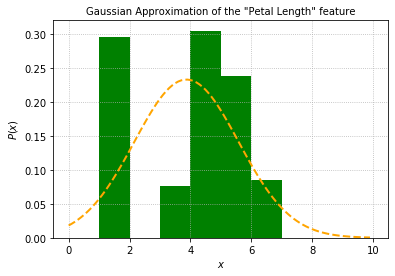

In [27]:
# determine mean and std of the "petal length" feature
mean_petal_length = np.mean(x_train[:, 2])
std_petal_length = np.std(x_train[:, 2])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_length, std_petal_length), color='orange', linestyle='--', linewidth=2)

# plot histogram of "petal length" observations
ax.hist(x_train[:, 2], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Length" feature', fontsize=10);

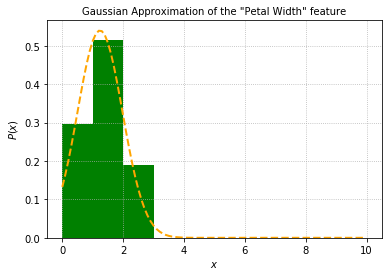

In [28]:
# determine mean and std of the "petal width" feature
mean_petal_width = np.mean(x_train[:, 3])
std_petal_width = np.std(x_train[:, 3])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_width, std_petal_width), color='orange', linestyle='--', linewidth=2)

# plot histogram of "petal width" observations
ax.hist(x_train[:, 3], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Width" feature', fontsize=10);

#### Step 1.2.3. Calculation of the likelihood $P(x|c)$ of each feature

Let's now see how we can calculate the **likelihood** $P(x|c)$ which is the probability density of a feature given a certain class $c$. We will again can estimate $P(x|c)$ by a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$ applying the "law of large numbers".

The **likelihood** probability density of a Gaussian "Normal" distribution, as defined by the formula below, is determined by its mean $\mu$, standard deviation $\sigma$ and it's corresponding class condition $c$:

<img align="center" style="max-width: 600px; height: auto" src="likelihood_calculation.png">

Let's start by applying the class conditioning. This is usually done by filtering the dataset for each class $c$:

In [29]:
# collect all iris setosa measurements, class label = 0
x_train_setosa = x_train[y_train == 0]

# collect all iris versicolor measurements, class label = 1
x_train_versicolor = x_train[y_train == 1]

# collect all iris virginica measurements, class label = 2
x_train_virginica = x_train[y_train == 2]

Let's start by inspecting the true probability density of the **sepal length** feature (the first feature) of the iris dataset given the class **setosa**. The following line of code determines a histogram of the true feature value distribution:

In [30]:
# determine a histogram of the "sepal length" feature value distribution given the class "setosa"
hist_setosa, bin_edges_setosa = np.histogram(x_train_setosa[:, 0], bins=10, range=(0, 10), density=True)

# print the histogram feature value probabilites
print(hist_setosa)

# print the histogram edges
print(bin_edges_setosa)

[0.         0.         0.         0.         0.38709677 0.61290323
 0.         0.         0.         0.        ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Let's also plot the probability density accordingly:

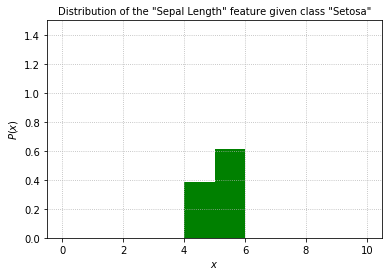

In [31]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 0], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)
ax.set_ylim([0.0, 1.5])

# add plot title
ax.set_title('Distribution of the "Sepal Length" feature given class "Setosa"', fontsize=10);

We are again able to determine the approximate Gaussian (Normal) probability density distribution $\mathcal{N}(\mu, \sigma, c)$ of the **sepal length** feature given the class **setosa** using the $\mu$ and $\sigma$ obtained above as well as the `pdf.norm` function of the `scipy.stats` package.

Let's continue by calculating the mean $\mu$ of the **sepal length** feature given the class **setosa**:

In [32]:
# calculate the mean of the sepal length observations given class "setosa"
mean_sepal_length_setosa = np.mean(x_train_setosa[:, 0])

# print the obtained mean
print(mean_sepal_length_setosa)

4.964516129032259


Let's continue by calculating the standard devition $\sigma$ of the **sepal length** feature given the class **setosa**:

In [33]:
# calculate the standard deviation of the sepal length observations given class "setosa"
std_sepal_length_setosa = np.std(x_train_setosa[:, 0])

# print the obtained standard deviation
print(std_sepal_length_setosa)

0.3346142575455468


In [34]:
# calculate the probability density function of the Gaussian distribution
hist_gauss_sepal_length_setosa = norm.pdf(np.arange(0, 10, 0.1), mean_sepal_length_setosa, std_sepal_length_setosa)

# print obtained probabilities
print(hist_gauss_sepal_length_setosa)

[1.89371035e-48 1.52597518e-46 1.12458830e-44 7.57969668e-43
 4.67220906e-41 2.63393397e-39 1.35799970e-37 6.40334116e-36
 2.76137750e-34 1.08907327e-32 3.92826330e-31 1.29585454e-29
 3.90952592e-28 1.07870853e-26 2.72205129e-25 6.28203961e-24
 1.32591966e-22 2.55944574e-21 4.51842230e-20 7.29524505e-19
 1.07722178e-17 1.45473049e-16 1.79668579e-15 2.02942917e-14
 2.09646608e-13 1.98067835e-12 1.71140283e-11 1.35239237e-10
 9.77384288e-10 6.46011381e-09 3.90505505e-08 2.15886918e-07
 1.09153500e-06 5.04732399e-06 2.13450351e-05 8.25552581e-05
 2.92014744e-04 9.44663198e-04 2.79486855e-03 7.56237054e-03
 1.87140030e-02 4.23533346e-02 8.76638824e-02 1.65945686e-01
 2.87291917e-01 4.54875999e-01 6.58680511e-01 8.72305839e-01
 1.05651318e+00 1.17028930e+00 1.18556051e+00 1.09841484e+00
 9.30724686e-01 7.21254023e-01 5.11172450e-01 3.31328508e-01
 1.96409435e-01 1.06482456e-01 5.27965996e-02 2.39412057e-02
 9.92883419e-03 3.76584702e-03 1.30628898e-03 4.14407904e-04
 1.20234464e-04 3.190377

Let's now plot the approximate Gaussian (Normal) probability density distribution $P(x | c) \approx \mathcal{N}(\mu, \sigma, c)$:

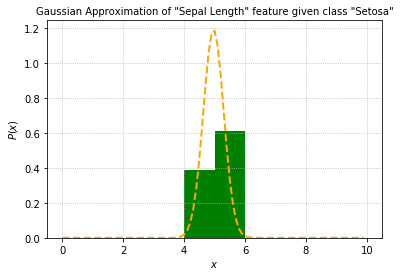

In [35]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), hist_gauss_sepal_length_setosa, color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 0], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of "Sepal Length" feature given class "Setosa"', fontsize=10);

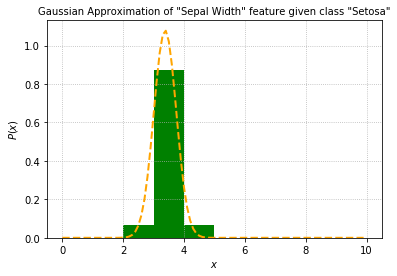

In [36]:
# determine mean and std of the "sepal width" feature given class setosa
mean_sepal_width_setosa = np.mean(x_train_setosa[:, 1])
std_sepal_width_setosa = np.std(x_train_setosa[:, 1])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_sepal_width_setosa, std_sepal_width_setosa), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 1], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of "Sepal Width" feature given class "Setosa"', fontsize=10);

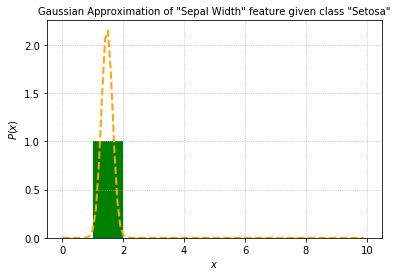

In [37]:
# determine mean and std of the "petal length" feature given class setosa
mean_petal_length_setosa = np.mean(x_train_setosa[:, 2])
std_petal_length_setosa = np.std(x_train_setosa[:, 2])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_length_setosa, std_petal_length_setosa), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 2], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of "Sepal Width" feature given class "Setosa"', fontsize=10);

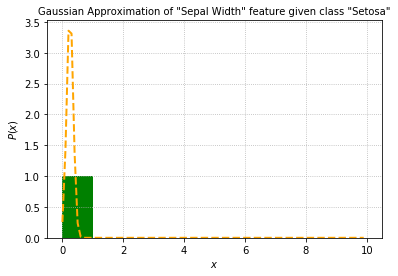

In [38]:
# determine mean and std of the "petal width" feature given class setosa
mean_petal_width_setosa = np.mean(x_train_setosa[:, 3])
std_petal_width_setosa = np.std(x_train_setosa[:, 3])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_width_setosa, std_petal_width_setosa), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 3], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of "Sepal Width" feature given class "Setosa"', fontsize=10);

Now we have determined all the necessary probabilities and probability distributions $P(c)$, $P(x)$ and $P(x|c)$ to determine if a so far unseen **iris flower** observation corresponds to class **setosa**. Let's calculate the probability of two random observations of beeing of class **setosa**: 

In [39]:
# init a random feature observation 
sepal_length = 5.8 
sepal_width  = 3.5
petal_length = 1.5
petal_width  = 0.25

# calculate the distinct elements of the Bayes theorem formula

# init the prior probability
prior = 0.3333 

# determine the likelihood probability
likelihood = norm.pdf(sepal_length, mean_sepal_length_setosa, std_sepal_length_setosa) * norm.pdf(sepal_width, mean_sepal_width_setosa, std_sepal_width_setosa) * norm.pdf(petal_length, mean_petal_length_setosa, std_petal_length_setosa) * norm.pdf(petal_width, mean_petal_width_setosa, std_petal_width_setosa)

# determine the evidence probability
evidence = norm.pdf(sepal_length, mean_sepal_length, std_sepal_length) * norm.pdf(sepal_width, mean_sepal_width, std_sepal_width) * norm.pdf(petal_length, mean_petal_length, std_petal_length) * norm.pdf(petal_width, mean_petal_width, std_petal_width)

# determine the posterior probability
posterior = (prior * likelihood) / evidence

# print the obtained posterior probability
print(posterior)

31.606542710136253


Ok, it seems to be likely that this Iris flower is of class **setosa**.

Let's compare this to a another **iris flower** observation and determine its probability of beeing of class **setosa**:

In [40]:
# init a second random feature observation 
sepal_length = 7.8
sepal_width  = 2.3
petal_length = 6.4
petal_width  = 2.5

# calculate the distinct elements of the Bayes theorem formula

# init the prior probability
prior = 0.3333 

# determine the likelihood probability
likelihood = norm.pdf(sepal_length, mean_sepal_length_setosa, std_sepal_length_setosa) * norm.pdf(sepal_width, mean_sepal_width_setosa, std_sepal_width_setosa) * norm.pdf(petal_length, mean_petal_length_setosa, std_petal_length_setosa) * norm.pdf(petal_width, mean_petal_width_setosa, std_petal_width_setosa)

# determine the evidence probability
evidence = norm.pdf(sepal_length, mean_sepal_length, std_sepal_length) * norm.pdf(sepal_width, mean_sepal_width, std_sepal_width) * norm.pdf(petal_length, mean_petal_length, std_petal_length) * norm.pdf(petal_width, mean_petal_width, std_petal_width)

# determine the posterior probability
posterior = (prior * likelihood) / evidence

# print the obtained posterior probability
print(posterior)

5.673361173423978e-268


Alright, this observations seems to be very improbable of class **setosa**.

#### Step 1.2.4. Training and utilization of a Gaussian Naive-Bayes Classifier using Python's Sklearn library

Luckily, there is a Python library named `sklearn` (https://scikit-learn.org) that provides a variety of machine learning algorithms that can be easily interfaced using the Python programming language. It also contains supervised classification algorithms such as the **Gaussian Naive-Bayes** classifier which we can use of the shelf.

Let's use `sklearn` and instantiate the **Gaussian Naive-Bayes** classifier:

In [41]:
# init the Gaussian Naive Bayes classifier
gnb = GaussianNB(priors=None, var_smoothing=1e-09)

Train or fit the Gaussian Naive-Bayes classifier using the training dataset features and labels:

In [42]:
# train the Gaussian Naive Bayes classifier
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Utilize the trained model to predict the classes of the distinct observations contained in the evaluation dataset:

In [43]:
y_pred = gnb.predict(x_eval)

Let's have a look at the class labels **predicted** by the Gaussian Naive-Bayes classifier on the evaluation dataset:

In [44]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

As well as the **true** class labels as contained in the evaluation dataset:

In [45]:
y_eval

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

Determine the **prediction accuracy** of the trained model on the evaluation dataset:

In [46]:
print("Accuracy: ", metrics.accuracy_score(y_eval, y_pred))

Accuracy:  0.9777777777777777


Determine number of **missclassified** data sampels in the evaluation dataset:

In [47]:
print("Number of mislabeled points out of a total {} points: {}".format(x_eval.shape[0], np.sum(y_eval != y_pred)))

Number of mislabeled points out of a total 45 points: 1


In the field of machine learning and in particular the field of statistical classification, a **confusion matrix**, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the number of instances that the classifier predicted per class, while each column represents the instances of the true or actual class:

<img align="center" style="max-width: 300px; height: auto" src="confusion_matrix.png">

(Source: https://en.wikipedia.org/wiki/Confusion_matrix)

Determine and plot the **confusion matrix** of the individual predictions:

In [48]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Plot the **confusion matrix** of the individual predictions:

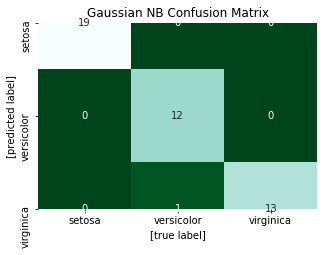

In [49]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r', xticklabels=iris.target_names, yticklabels=iris.target_names)

# add plot axis labels
plt.xlabel('[true label]')
plt.ylabel('[predicted label]')

# add plot title
plt.title('Gaussian NB Confusion Matrix');

### Exercises:

We recommend you to try the following exercises as part of the lab:

**1. Train and evaluate the prediction accuracy of different train- vs. eval-data ratios.**

> Change the ratio of training data vs. evaluation data to 30%/70% (currently 70%/30%), fit your model and calculate the new classification accuracy. Subsequently, repeat the experiment a second time using a 10%/90% fraction of training data/evaluation data. What can be observed in both experiments in terms of classification accuracy? 

**2. Calculate the true-positive as well as the false-positive rate of the Iris versicolor vs. virginica.**

> Calculate the true-positive rate as well as false-positive rate of (1) the experiment exhibiting a 30%/70% ratio of training data vs. evaluation data and (2) the experiment exhibiting a 10%/90% ratio of training data vs. evaluation data.

## B. k Nearest-Neighbor (kNN) Classification

Now, let's have closer into a non-parametric method used for supervised classification tasks referred to as the the **k Nearest-Neighbors (kNN)** algorithm. As you learned during the in lecture k-NN classification, the output of the classifier is a class membership. 

Prior to running **k Nearest-Neighbor (k-NN)** classification let's briefly revisit the distinct steps of the algorithm as discussed in the lecture:
<img align="center" style="max-width: 600px; height: auto" src="hsg_knn.png">

An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

### Step 2.1: Dataset Download and Data Assessment

Let's try the k Nearest-Neighbour algorithm using the delcious **"Wine"** dataset is a classic and very easy multi-class classification dataset. 

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators (types). The dataset consists of in total **178 wines** as well as their corresponding **13 different measurements** taken for different constituents found in the three types of wine. Please, find below the list of the individual measurements (features):

>- `Alcohol`
>- `Malic acid`
>- `Ash`
>- `Alcalinity of ash`
>- `Magnesium`
>- `Total phenols`
>- `Flavanoids`
>- `Nonflavanoid phenols`
>- `Proanthocyanins`
>- `Color intensity`
>- `Hue`
>- `OD280/OD315 of diluted wines`
>- `CProline`

Further details on the dataset can be obtained from the following puplication: *Forina, M. et al, PARVUS - "An Extendible Package for Data Exploration, Classification and Correlation.", Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.*

Let's load the dataset and conduct a preliminary data assessment: 

In [50]:
wine = datasets.load_wine()

Print and inspect feature names of the dataset:

In [51]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Print and inspect the class names of the dataset:

In [52]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Print and inspect the top 10 feature rows of the dataset:

In [53]:
pd.DataFrame(wine.data).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


Print and inspect the top 10 labels of the dataset:

In [54]:
pd.DataFrame(wine.target).head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Determine and print the feature dimensionality of the dataset:

In [55]:
wine.data.shape

(178, 13)

Determine and print the label dimensionality of the dataset:

In [56]:
wine.target.shape

(178,)

Plot the data distributions of the distinct features:

<Figure size 720x720 with 0 Axes>

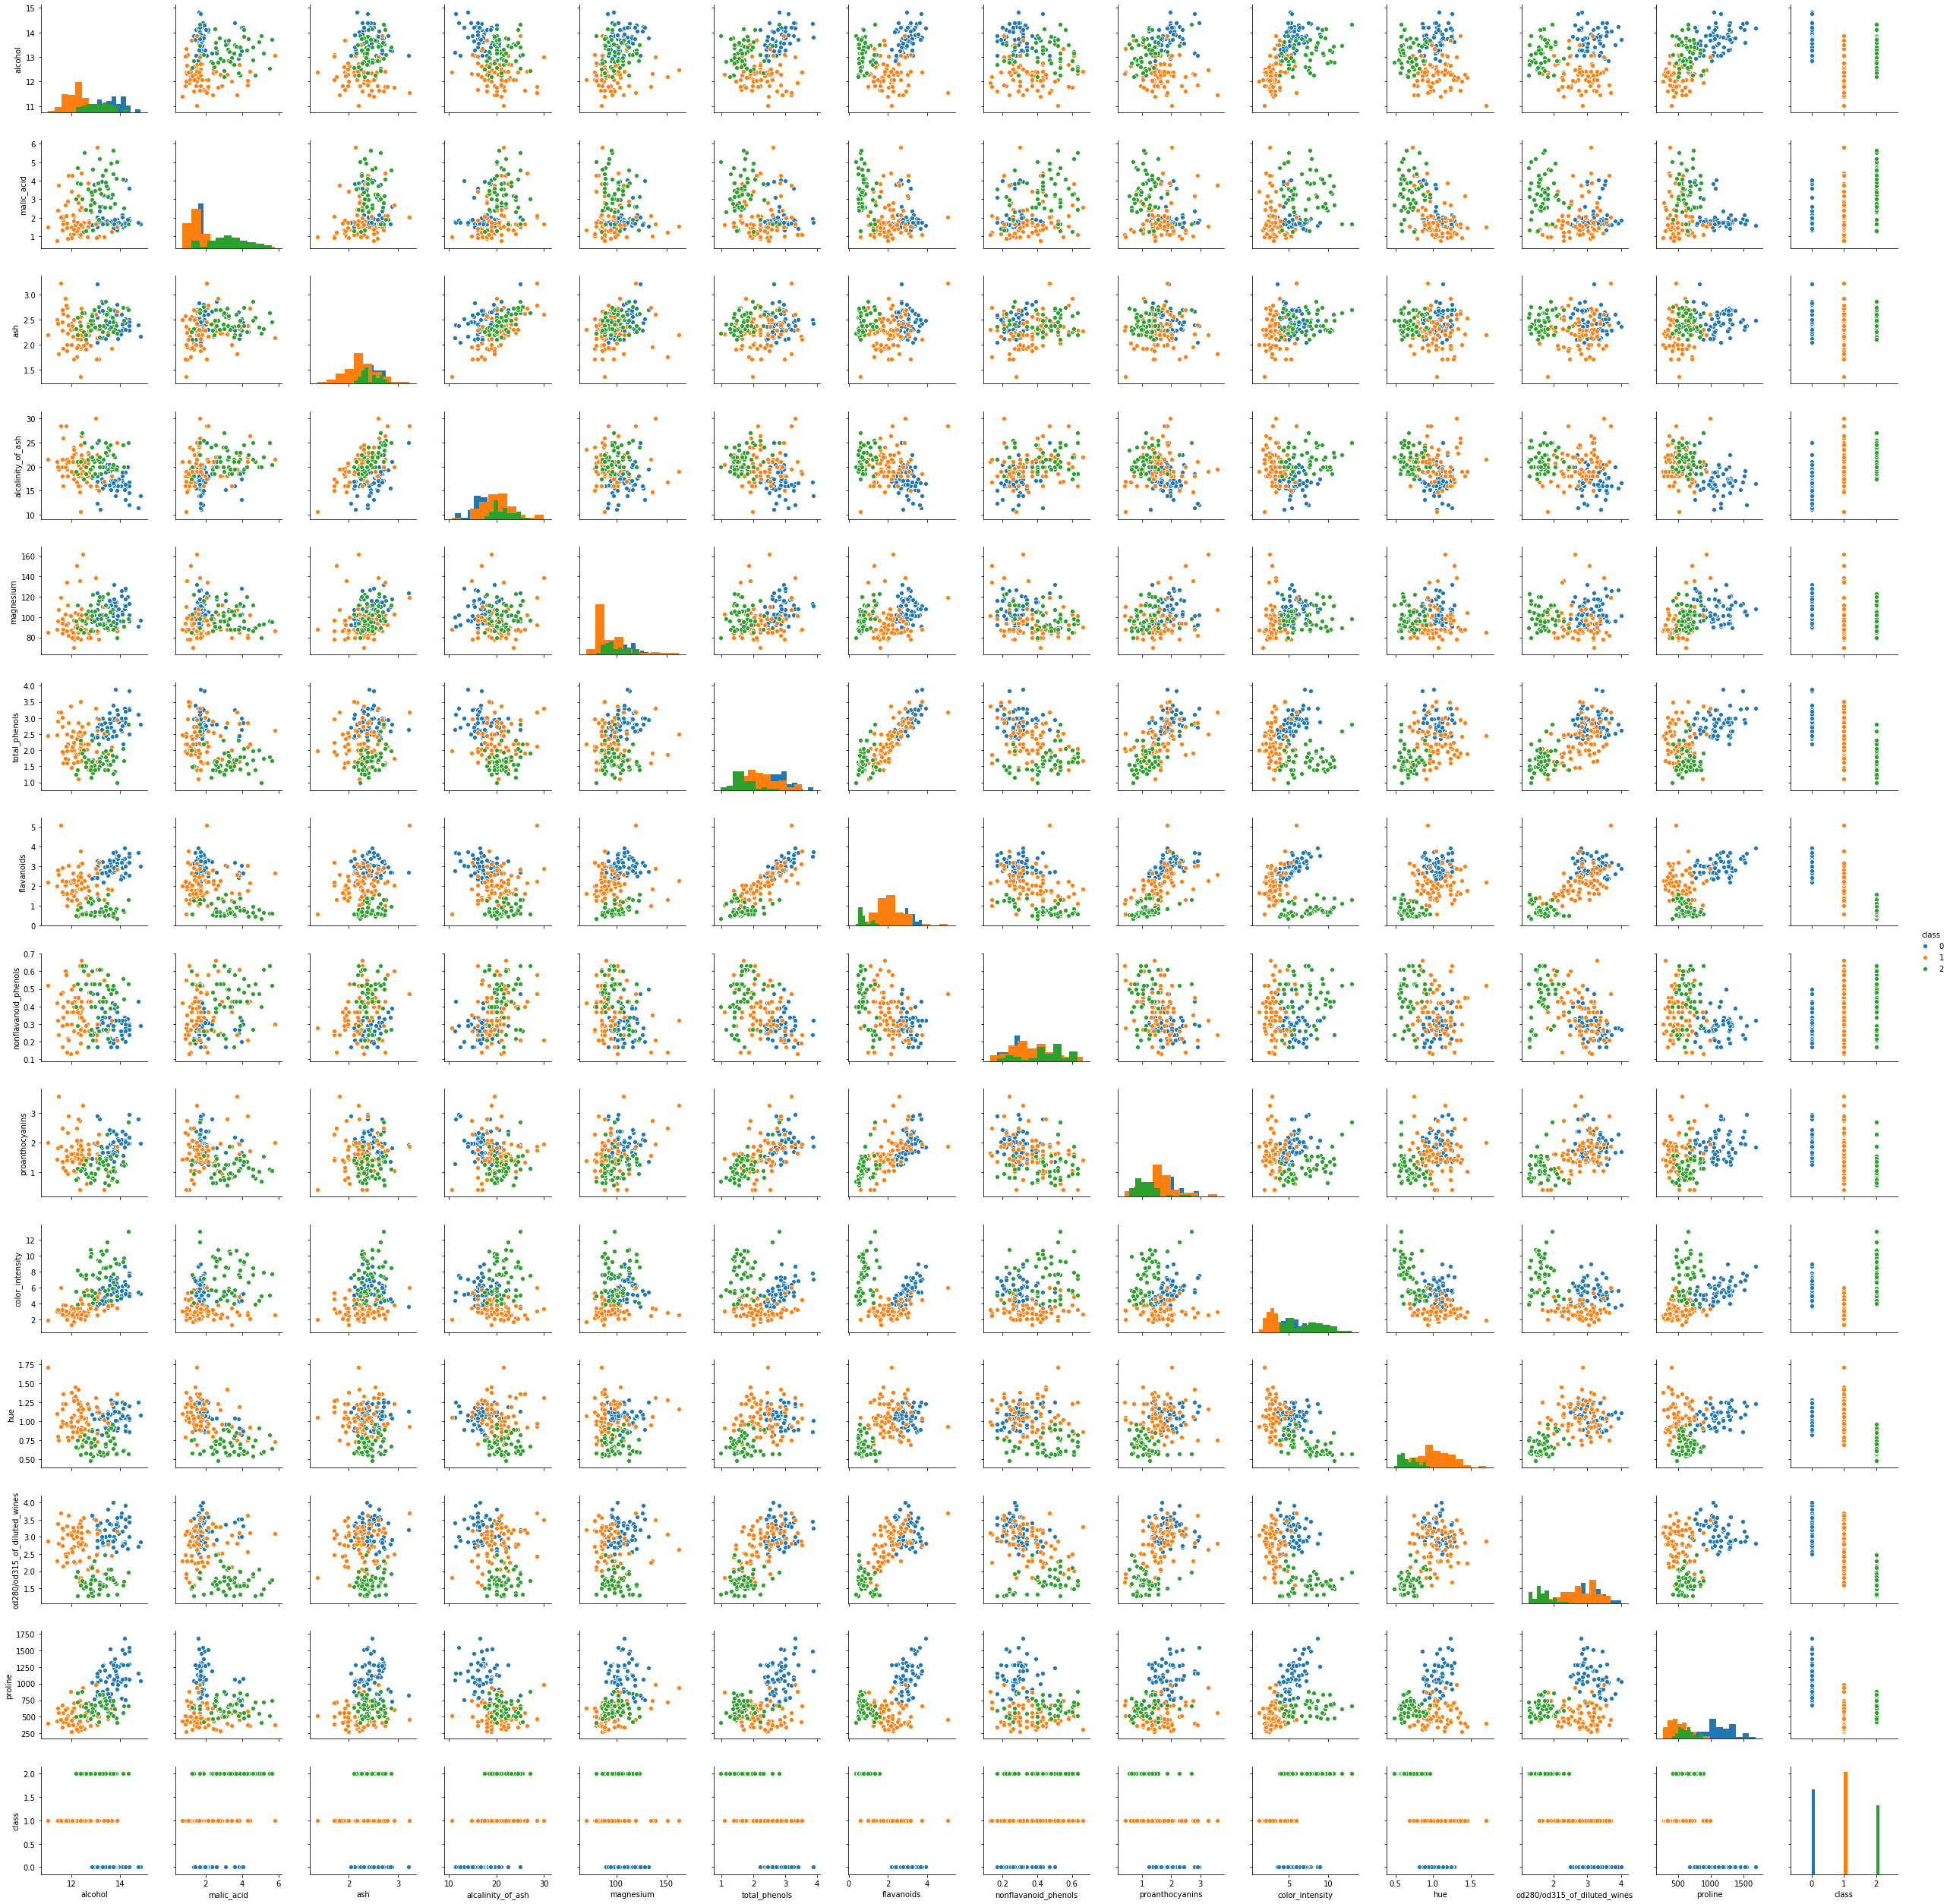

In [57]:
# init the plot
plt.figure(figsize=(10, 10))

# prepare the dataset to be plotable using seaborn

# convert to Panda's DataFrame
wine_plot = pd.DataFrame(wine.data, columns=wine.feature_names)

# add class labels to the DataFrame
wine_plot['class'] = wine.target

# plot a pairplot of the distinct feature distributions
sns.pairplot(wine_plot, diag_kind='hist', hue='class');

### 2.2. Dataset Pre-Processing

#### 2.2.1 Data Normalization

In [58]:
# min-max normalize the distinct feature values
wine_data_norm = normalize(wine.data, norm='max', axis=0)

Print and inspect the top 10 feature rows of the normalized dataset:

In [59]:
pd.DataFrame(wine_data_norm).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.959541,0.294828,0.752322,0.520000,0.783951,0.721649,0.602362,0.424242,0.639665,0.433846,0.608187,0.9800,0.633929
1,0.890088,0.306897,0.662539,0.373333,0.617284,0.682990,0.543307,0.393939,0.357542,0.336923,0.614035,0.8500,0.625000
2,0.887390,0.406897,0.826625,0.620000,0.623457,0.721649,0.637795,0.454545,0.784916,0.436923,0.602339,0.7925,0.705357
3,0.968982,0.336207,0.773994,0.560000,0.697531,0.992268,0.687008,0.363636,0.608939,0.600000,0.502924,0.8625,0.880952
4,0.892785,0.446552,0.888545,0.700000,0.728395,0.721649,0.529528,0.590909,0.508380,0.332308,0.608187,0.7325,0.437500
5,0.957519,0.303448,0.758514,0.506667,0.691358,0.842784,0.667323,0.515152,0.550279,0.519231,0.614035,0.7125,0.863095
6,0.970330,0.322414,0.758514,0.486667,0.592593,0.644330,0.496063,0.454545,0.553073,0.403846,0.596491,0.8950,0.767857
7,0.948078,0.370690,0.808050,0.586667,0.746914,0.670103,0.494094,0.469697,0.349162,0.388462,0.619883,0.8950,0.770833
8,1.000000,0.282759,0.671827,0.466667,0.598765,0.721649,0.586614,0.439394,0.553073,0.400000,0.631579,0.7125,0.622024
9,0.934592,0.232759,0.702786,0.533333,0.604938,0.768041,0.620079,0.333333,0.516760,0.555385,0.590643,0.8875,0.622024


#### 2.2.2 Extraction of Training- and Evaluation-Dataset

To understand and evaluate the performance of any trained supervised machine learning model, it is good practice, to divide the dataset into a **training set** (the fraction of data records solely used for training purposes) and a **evaluation set** (the fraction of data records solely used for evaluation purposes). Pls. note, the **evaluation set** will never be shown to the model as part of the training process.

<img align="center" style="max-width: 500px; height: auto" src="train_eval_dataset.png">

We set the fraction of testing records to **30%** of the original dataset:

In [60]:
eval_fraction = 0.3

Randomly split the dataset into training set and evaluation set using sklearns `train_test_split` function:

In [61]:
# 70% training and 30% evaluation
X_train, X_eval, y_train, y_eval = train_test_split(wine_data_norm, wine.target, test_size=eval_fraction)

Evaluate the training set dimensionality:

In [62]:
X_train.shape, y_train.shape

((124, 13), (124,))

Evaluate the evaluation set dimensionality:

In [63]:
X_eval.shape, y_eval.shape

((54, 13), (54,))

### 2.3. k Nearest-Neighbor (kNN) Classification

#### 3.1 Nearest Neighbors Classification, k=5

Set the number of neighbors `k` to be considered in the classification of each sample: 

In [64]:
k_nearest_neighbors = 5

Set the metric used in calculating the distances $D(x, x_i)$ between a sample $x$ and it's neighbors $x_i$. We will use the Euclidean distance that you learned about in the lecture, given by $\sqrt{(\sum^n_{i=1}((x - x_i)^2))}$:

In [65]:
distance_metric = 'euclidean'

Init the **kNN classifier** of Python's `sklearn` libary of data science algoritms: 

In [66]:
knn = KNeighborsClassifier(n_neighbors=k_nearest_neighbors, metric=distance_metric)

Train the k-NN classifier using the training dataset:

In [67]:
knn.fit(X_train, y_train);

Utilize the trained model to predict the response for the evaluation dataset:

In [68]:
y_pred = knn.predict(X_eval)

Let's have a look at the predicted class labels:

In [69]:
y_pred

array([0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 1])

As well as the true class labels:

In [70]:
y_eval

array([0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 2, 1])

Determine **prediction accuracy** of the trained model on the evaluation dataset:

In [71]:
print("Accuracy, k=5: ", metrics.accuracy_score(y_eval, y_pred))

Accuracy, k=5:  0.9444444444444444


Determine and plot the **confusion matrix** of the individual predictions:

In [72]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Plot confusion matrix of the individual predictions:

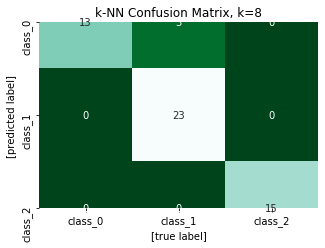

In [73]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r', xticklabels=wine.target_names, yticklabels=wine.target_names)

# add plot axis labels
plt.xlabel('[true label]')
plt.ylabel('[predicted label]')

# add plot title
plt.title('k-NN Confusion Matrix, k=8');

Remember that as part of the lecture you learned about several measures to evaluate the quality of a retrieval system, namely **Precision**, **Recall** and **F1-Score**. Let's briefly revisit their definition and subsequently calculate those measures based on the confusion matrix above:

>- The **Precision**, denoted by Precision $=\frac{TP}{TP + FP}$, is the probability that a retrieved document is relevant.
>- The **Recall**, denoted by Recall $=\frac{TP}{TP + FN}$, is the probability that a relevant document is retrieved.
>- The **F1-Score**, denoted by F1-Score $= 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$, combines precision and recall is the harmonic mean of both measures.

In [74]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.88      0.94        26
           2       1.00      1.00      1.00        15

    accuracy                           0.94        54
   macro avg       0.94      0.96      0.95        54
weighted avg       0.95      0.94      0.95        54



#### 3.2 Nearest Neighbors Classification, k=8

Set the number of neighbors `k` to be considered in the classification of each sample: 

In [75]:
k_nearest_neighbors = 8

Init the **k-NN classifier** of Python's `sklearn` libary of data science algoritms: 

In [76]:
knn = KNeighborsClassifier(n_neighbors=k_nearest_neighbors)

Train the k-NN classifier using the training dataset:

In [77]:
knn.fit(X_train, y_train);

Utilize the trained model to predict the response for the evaluation dataset:

In [78]:
y_pred = knn.predict(X_eval)

Determine **prediction accuracy** of the trained model on the evaluation dataset:

In [79]:
print("Accuracy, k=8: ", metrics.accuracy_score(y_eval, y_pred))

Accuracy, k=8:  0.9444444444444444


Determine and plot the **confusion matrix** of the individual predictions:

In [80]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Plot **confusion matrix** of the individual predictions:

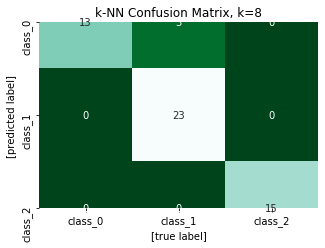

In [81]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r', xticklabels=wine.target_names, yticklabels=wine.target_names)

# add plot axis labels
plt.xlabel('[true label]')
plt.ylabel('[predicted label]')

# add plot title
plt.title('k-NN Confusion Matrix, k=8');

Let's also obtain and compare the **Precision**, **Recall**, and, **F1-Score** of the `k=8` model:

In [82]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.88      0.94        26
           2       1.00      1.00      1.00        15

    accuracy                           0.94        54
   macro avg       0.94      0.96      0.95        54
weighted avg       0.95      0.94      0.95        54



### Exercises:

We recommend you to try the following exercises as part of the lab:

**1. Train and evaluate the prediction accuracy of the k=1,...,40 Nearest Neighbor models.**

> Write a Python loop that trains and evaluates the prediction accuracy of all k-Nearest Neighbor parametrizations ranging from k=1,...,40. Collect and print the prediction accuracy of each model respectively and compare the results. What kind of behaviour in terms of prediction accuracy can be observed with increasing k?

**2. Plot the prediction accuracy of the k=1,...,40 Nearest Neighbor models.**

> Plot the prediction accuracy collected for each model above. The plot should display the distinct values of k at the x-axis and the corresponding model prediction accuracy on the y-axis.

**3. Train, evaluate and plot the prediction accuracy of the k=1,...,124 Nearest Neighbor models.**

> Train, evaluate and plot the prediction accuracy of all k-Nearest Neighbor parametrizations ranging from k=1,...,124. Collect and print the prediction accuracy of each model respectively and compare the results. What kind of behaviour in terms of prediction accuracy can be observed with increasing k?

### Lab Summary:

In this third lab, a step by step introduction into (1) **Gaussian Naive-Bayes (GNB)** and (2) **k Nearest-Neighbor (kNN)** classification is presented. The code and exercises presented in this lab may serves as a starting point for more complex and tailored programs.

You may want to execute the content of your lab outside of the Jupyter notebook environment, e.g. on a compute node or a server. The cell below converts the lab notebook into a standalone and executable python script. Pls. note that to convert the notebook, you need to install Python's **nbconvert** library and its extensions:

In [83]:
# installing the nbconvert library
!pip install nbconvert
!pip install jupyter_contrib_nbextensions

/bin/sh: pip: command not found
/bin/sh: pip: command not found


Let's now convert the Jupyter notebook into a plain Python script:

In [84]:
!jupyter nbconvert --to script mldl_lab_03.ipynb

[NbConvertApp] WARNING | pattern 'mldl_lab_03.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output to stdou